In [0]:
import numpy as np
import matplotlib.pyplot as plt

![alt text](https://i.stack.imgur.com/04Ggq.jpg)

![alt text](https://i.imgur.com/Q0IFzC0.png)

In [0]:
# decide on how many arms
arms = 5
means = np.random.normal(size = arms)

# initialize Q values
Q_values = arms*[0]
N_actions = arms*[0]

# decide on number of iterations (episodes)
iterations = 10

for i in range(1,iterations):
    argmaxQ = np.argmax(Q_values) # get best action
    N_actions[argmaxQ]+=1 # increment action count
    old_Q = Q_values[argmaxQ] # get best Q value
    r = np.random.normal(means[argmaxQ]) # get the reward
    new_Q = old_Q+1/N_actions[argmaxQ]*(r-old_Q) # get the new Q value
    Q_values[argmaxQ] = new_Q # update old Q value with new one
    print('iteration:',i,'\nQ_values:',Q_values,'\nselected action:',argmaxQ,'\n')
print('True values:',means,'\nTrue optimal action:',np.argmax(means))

iteration: 1 
Q_values: [-1.0343468334488168, 0, 0, 0, 0] 
selected action: 0 

iteration: 2 
Q_values: [-1.0343468334488168, -0.9196423896645585, 0, 0, 0] 
selected action: 1 

iteration: 3 
Q_values: [-1.0343468334488168, -0.9196423896645585, 1.4235637453618075, 0, 0] 
selected action: 2 

iteration: 4 
Q_values: [-1.0343468334488168, -0.9196423896645585, 0.8924034507313966, 0, 0] 
selected action: 2 

iteration: 5 
Q_values: [-1.0343468334488168, -0.9196423896645585, 0.8264087987919144, 0, 0] 
selected action: 2 

iteration: 6 
Q_values: [-1.0343468334488168, -0.9196423896645585, 0.5253365394144132, 0, 0] 
selected action: 2 

iteration: 7 
Q_values: [-1.0343468334488168, -0.9196423896645585, 0.9249840182833673, 0, 0] 
selected action: 2 

iteration: 8 
Q_values: [-1.0343468334488168, -0.9196423896645585, 1.1262510349640638, 0, 0] 
selected action: 2 

iteration: 9 
Q_values: [-1.0343468334488168, -0.9196423896645585, 0.7225995735619049, 0, 0] 
selected action: 2 

True values: [ 0.

For simplicity lets wrap multiarmed bandit in a  function.

In [0]:
def multiarmedbandit(arms,iterations):
    
    # initialize environment
    means = np.random.normal(size = arms)
    optimal_action = np.argmax(means) # get optimal action

    # initialize Q values
    Q_values = arms*[0]
    N_actions = arms*[0]
    
    # initalize list actions taken
    actions_taken = []

    for i in range(1,iterations):
        argmaxQ = np.argmax(Q_values) # get best action
        actions_taken.append(argmaxQ)
        N_actions[argmaxQ]+=1 # increment action count
        old_Q = Q_values[argmaxQ] # get best Q value
        r = np.random.normal(means[argmaxQ]) # get the reward
        new_Q = old_Q+1/N_actions[argmaxQ]*(r-old_Q) # get the new Q value
        Q_values[argmaxQ] = new_Q # update old Q value with new one
  
    return (np.array(actions_taken) == optimal_action).astype(int)

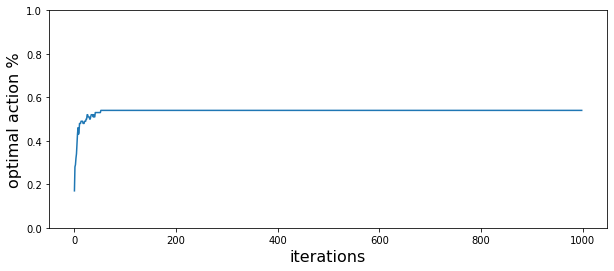

In [0]:
n_test = 100 # number of games
arms = 5
iterations = 1000
correct_actions = np.sum([multiarmedbandit(arms,iterations) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.figure(figsize = (10,4))
plt.plot(correct_actions_percentage)
plt.ylabel('optimal action %',fontsize = 16)
plt.ylim(0,1)
plt.xlabel('iterations',fontsize = 16)
plt.show()

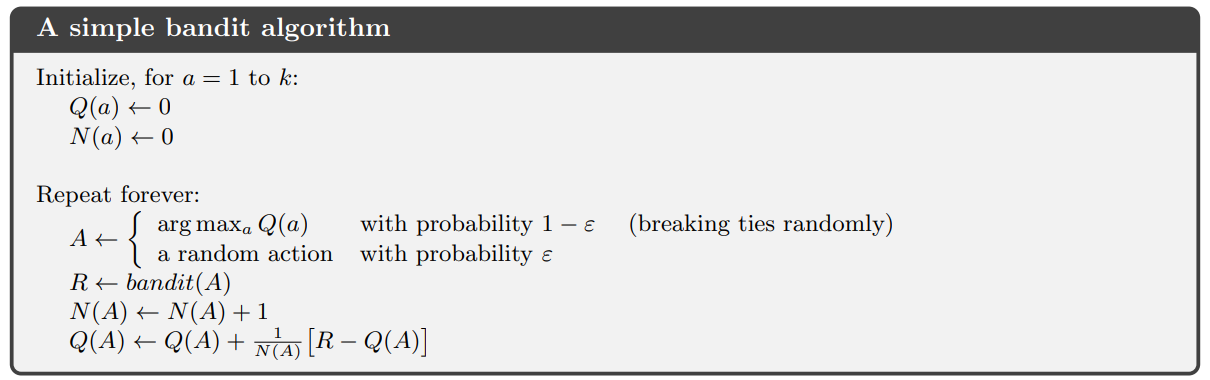

In [0]:
def multiarmedbandit(arms,iterations,epsilon = 0):
    
    # initialize environment
    means = np.random.normal(size = arms)
    optimal_action = np.argmax(means) # get optimal action

    # initialize Q values
    Q_values = arms*[0]
    N_actions = arms*[0]
    
    # initalize list actions taken
    actions_taken = []

    for i in range(1,iterations):
        if np.random.random()<epsilon:
            argmaxQ = np.random.choice(arms) # chose randomly
        else:
            argmaxQ = np.argmax(Q_values) # get best action
        actions_taken.append(argmaxQ)
        N_actions[argmaxQ]+=1 # increment action count
        old_Q = Q_values[argmaxQ] # get best Q value
        r = np.random.normal(means[argmaxQ]) # get the reward
        new_Q = old_Q+1/N_actions[argmaxQ]*(r-old_Q) # get the new Q value
        Q_values[argmaxQ] = new_Q # update old Q value with new one
  
    return (np.array(actions_taken) == optimal_action).astype(int)

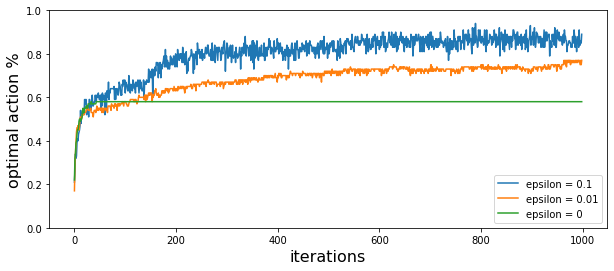

In [0]:
n_test = 100
arms = 5
iterations = 1000
plt.figure(figsize = (10,4))

epsilon = 0.1
correct_actions = np.sum([multiarmedbandit(arms,iterations,epsilon) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.plot(correct_actions_percentage,label = f'epsilon = {epsilon}')

epsilon = 0.01
correct_actions = np.sum([multiarmedbandit(arms,iterations,epsilon) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.plot(correct_actions_percentage,label = f'epsilon = {epsilon}')

epsilon = 0
correct_actions = np.sum([multiarmedbandit(arms,iterations,epsilon) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.plot(correct_actions_percentage,label = f'epsilon = {epsilon}')

plt.ylabel('optimal action %',fontsize = 16)
plt.ylim(0,1)
plt.xlabel('iterations',fontsize = 16)
plt.legend()
plt.show()

In [0]:
def multiarmedbandit(arms,iterations,epsilon = 0,optimistic = 0):
    
    # initialize environment
    means = np.random.normal(size = arms)
    optimal_action = np.argmax(means) # get optimal action

    # initialize Q values
    Q_values = arms*[optimistic]
    N_actions = arms*[0]
    
    # initalize list actions taken
    actions_taken = []

    for i in range(1,iterations):
        if np.random.random()<epsilon:
            argmaxQ = np.random.choice(arms) # chose randomly
        else:
            argmaxQ = np.argmax(Q_values) # get best action
        actions_taken.append(argmaxQ)
        N_actions[argmaxQ]+=1 # increment action count
        old_Q = Q_values[argmaxQ] # get best Q value
        r = np.random.normal(means[argmaxQ]) # get the reward
        new_Q = old_Q+1/N_actions[argmaxQ]*(r-old_Q) # get the new Q value
        Q_values[argmaxQ] = new_Q # update old Q value with new one
  
    return (np.array(actions_taken) == optimal_action).astype(int)

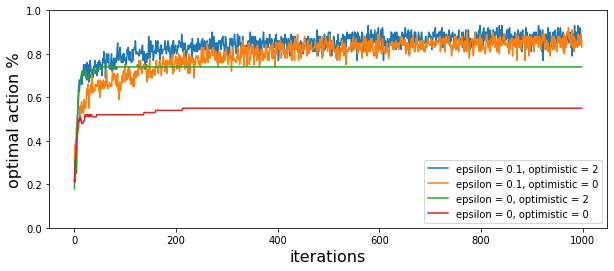

In [0]:
n_test = 100
arms = 5
iterations = 1000
plt.figure(figsize = (10,4))

epsilon = 0.1
optimistic = 2
correct_actions = np.sum([multiarmedbandit(arms,iterations,epsilon,optimistic) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.plot(correct_actions_percentage,label = f'epsilon = {epsilon}, optimistic = {optimistic}')

epsilon = 0.1
optimistic = 0
correct_actions = np.sum([multiarmedbandit(arms,iterations,epsilon,optimistic) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.plot(correct_actions_percentage,label = f'epsilon = {epsilon}, optimistic = {optimistic}')

epsilon = 0
optimistic = 2
correct_actions = np.sum([multiarmedbandit(arms,iterations,epsilon,optimistic) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.plot(correct_actions_percentage,label = f'epsilon = {epsilon}, optimistic = {optimistic}')

epsilon = 0
optimistic = 0
correct_actions = np.sum([multiarmedbandit(arms,iterations,epsilon,optimistic) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.plot(correct_actions_percentage,label = f'epsilon = {epsilon}, optimistic = {optimistic}')

plt.ylabel('optimal action %',fontsize = 16)
plt.ylim(0,1)
plt.xlabel('iterations',fontsize = 16)
plt.legend()
plt.show()

In [0]:
def multiarmedbandit(arms,iterations,epsilon = 0,optimistic = 0, epsilon_decay = 0):
    
    # initialize environment
    means = np.random.normal(size = arms)
    optimal_action = np.argmax(means) # get optimal action

    # initialize Q values
    Q_values = arms*[optimistic]
    N_actions = arms*[0]
    
    # initalize list actions taken
    actions_taken = []

    for i in range(1,iterations):
        if np.random.random()<epsilon:
            argmaxQ = np.random.choice(arms) # chose randomly
        else:
            argmaxQ = np.argmax(Q_values) # get best action
        epsilon-=epsilon*epsilon_decay # update new espilon
        actions_taken.append(argmaxQ)
        N_actions[argmaxQ]+=1 # increment action count
        old_Q = Q_values[argmaxQ] # get best Q value
        r = np.random.normal(means[argmaxQ]) # get the reward
        new_Q = old_Q+1/N_actions[argmaxQ]*(r-old_Q) # get the new Q value
        Q_values[argmaxQ] = new_Q # update old Q value with new one
  
    return (np.array(actions_taken) == optimal_action).astype(int)

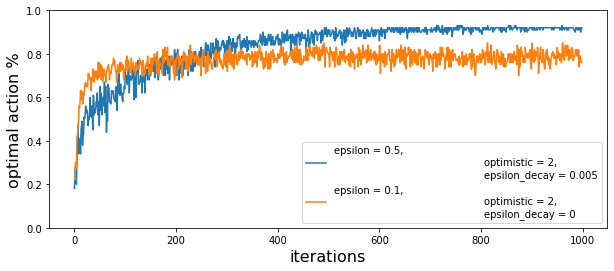

In [0]:
n_test = 100
arms = 5
iterations = 1000
plt.figure(figsize = (10,4))

epsilon = 0.5
optimistic = 2
epsilon_decay = 0.005
correct_actions = np.sum([multiarmedbandit(arms,iterations,
                                           epsilon,optimistic,epsilon_decay) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.plot(correct_actions_percentage,label = f'''epsilon = {epsilon},
                                                optimistic = {optimistic},
                                                epsilon_decay = {epsilon_decay}''')

epsilon = 0.1
optimistic = 2
epsilon_decay = 0
correct_actions = np.sum([multiarmedbandit(arms,iterations,
                                           epsilon,optimistic,epsilon_decay) for i in range(n_test)],axis = 0)
correct_actions_percentage = correct_actions/n_test
plt.plot(correct_actions_percentage,label = f'''epsilon = {epsilon},
                                                optimistic = {optimistic},
                                                epsilon_decay = {epsilon_decay}''')


plt.ylabel('optimal action %',fontsize = 16)
plt.ylim(0,1)
plt.xlabel('iterations',fontsize = 16)
plt.legend()
plt.show()